# Exploratory Data Analysis : Haberman's Survival

# Relevant Information

The dataset contains cases from a study that was conducted between 1958 and 1970 at university of chicago's Billing Hospital on the survival of patients who had surgery for breast cancer.

it contains:-

1. 305 datapoints/row
2. 4 feeature including class label

# Objective

To classify/predict a patient survival who had undergone surgery for breast cancer.

# Attributes Information


There are 4 features including class label/dependent variable.
1. Age of patient at the time of operation(numerical) 
2. Patient's year of operation(year--1900,numerical)
3. Number of positive auxilary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

Setting the objective is the key in EDA which will structure your thoughts in the entire analysis. Here the objective is to predict whether the patient will survive after 5 years or not based upon the patient’s age, year of treatment and the number of positive lymph nodes.

# Environment Configuration

Import the necessary packages and load data set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load the data set

In [3]:
cancer_df = pd.read_csv('haberman.csv',header=None, names=['age','year_of_treatment','positive_lymph_nodes','survival_status_after_5_years'])
print(cancer_df.head())

   age  year_of_treatment  positive_lymph_nodes  survival_status_after_5_years
0   30                 64                     1                              1
1   30                 62                     3                              1
2   30                 65                     0                              1
3   31                 59                     2                              1
4   31                 65                     4                              1


#  Data Preparation

In [4]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


##### Observations:
 

1. There is no data missing in this data set. So there is no need to do data imputation.
2. The datatype of ‘survival_status_after_5_years’ column is integer. It has to be converted to categorical datatype.
3. The values of ‘survival_status_after_5_years’ column are not meaningful. Hence they are mapped to ‘yes’ (survived after 5 years) and ‘no’ (not survived after 5 years)


Check the unique values of the target column. Modify the target column values to be meaningful as well as categorical.
        

In [5]:
print(list(cancer_df['survival_status_after_5_years'].unique()))

[1, 2]


In [6]:
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].map({1:"Yes",2:"no"})
cancer_df['survival_status_after_5_years'] = cancer_df['survival_status_after_5_years'].astype('category')
print(cancer_df.head())

   age  year_of_treatment  positive_lymph_nodes survival_status_after_5_years
0   30                 64                     1                           Yes
1   30                 62                     3                           Yes
2   30                 65                     0                           Yes
3   31                 59                     2                           Yes
4   31                 65                     4                           Yes


In [7]:
print(cancer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                              306 non-null int64
year_of_treatment                306 non-null int64
positive_lymph_nodes             306 non-null int64
survival_status_after_5_years    306 non-null category
dtypes: category(1), int64(3)
memory usage: 7.6 KB
None


#  High Level Statistics

The summary statistics that describes the centrality and the dispersion are used to understand the essence of the features.

In [8]:
print(cancer_df.describe())

              age  year_of_treatment  positive_lymph_nodes
count  306.000000         306.000000            306.000000
mean    52.457516          62.852941              4.026144
std     10.803452           3.249405              7.189654
min     30.000000          58.000000              0.000000
25%     44.000000          60.000000              0.000000
50%     52.000000          63.000000              1.000000
75%     60.750000          65.750000              4.000000
max     83.000000          69.000000             52.000000


In [9]:
print("Number of rows: "+ str(cancer_df.shape[0]))
print("Number of coloms: "+ str(cancer_df.shape[1]))
print("Colomns: "+", ".join(cancer_df.columns))

print("Target variable distribution")
print(cancer_df.iloc[:,-1].value_counts())
print("*"*50)
print(cancer_df.iloc[:,-1].value_counts(normalize = True))

Number of rows: 306
Number of coloms: 4
Colomns: age, year_of_treatment, positive_lymph_nodes, survival_status_after_5_years
Target variable distribution
Yes    225
no      81
Name: survival_status_after_5_years, dtype: int64
**************************************************
Yes    0.735294
no     0.264706
Name: survival_status_after_5_years, dtype: float64


# Observations:

1. The age of the patients vary from 30 to 83 with the median of 52.
2. Although the maximum number of positive lymph nodes observed is 52, nearly 75% of the patients have less than 5 positive lymph nodes and nearly 25% of the patients have no positive lymph nodes.
3. The data set contains only a small number of records (306).
4. The target column is imbalanced with 73% of values are ‘yes’.


#  Uni variate Analysis (pdf, cdf, boxplot and violin plot)

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

#  PDF(Probability Density Function)

Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points lie within that group. (histogram)
* Probability Density Function (PDF) is the probability that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group.



/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


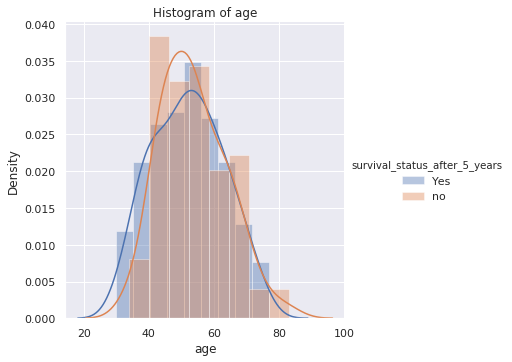

In [10]:
sns.FacetGrid(cancer_df, hue = "survival_status_after_5_years",size = 5).map(sns.distplot,"age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


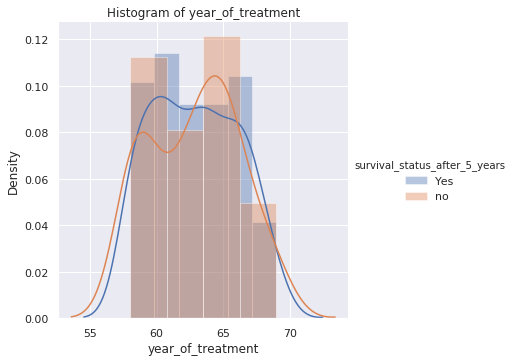

In [11]:
sns.FacetGrid(cancer_df, hue = "survival_status_after_5_years", size = 5).map(sns.distplot,"year_of_treatment").add_legend()
plt.title("Histogram of year_of_treatment")
plt.ylabel("Density")
plt.show()

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


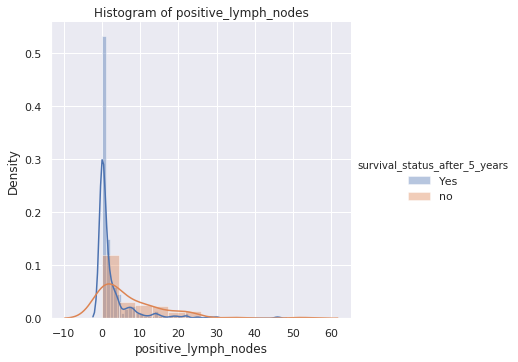

In [12]:
sns.FacetGrid(cancer_df,hue = "survival_status_after_5_years",size = 5).map(sns.distplot,"positive_lymph_nodes").add_legend()
plt.title("Histogram of positive_lymph_nodes")
plt.ylabel("Density")
plt.show()

##### Observations:

1. In all the plots the features are overlapping each other massively.

# CDF(Cumulative Distributed Function)

The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

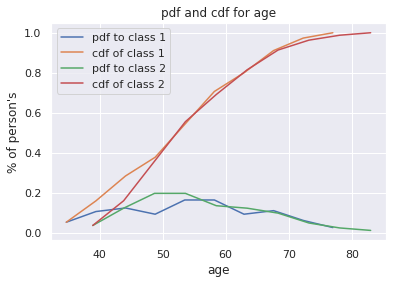

In [13]:
one = cancer_df.loc[cancer_df["survival_status_after_5_years"] == "Yes"]
two = cancer_df.loc[cancer_df["survival_status_after_5_years"] == "no"]
label = ["pdf to class 1","cdf of class 1","pdf to class 2","cdf of class 2"]
counts,bin_edges = np.histogram(one["age"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two["age"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

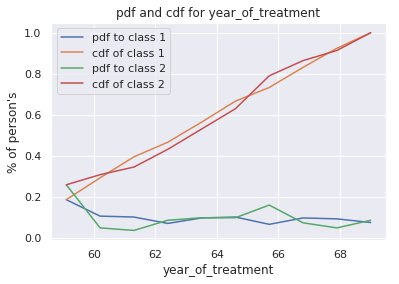

In [14]:
label = ["pdf to class 1","cdf of class 1","pdf to class 2","cdf of class 2"]
counts,bin_edges = np.histogram(one["year_of_treatment"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for year_of_treatment")
plt.xlabel("year_of_treatment")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two["year_of_treatment"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

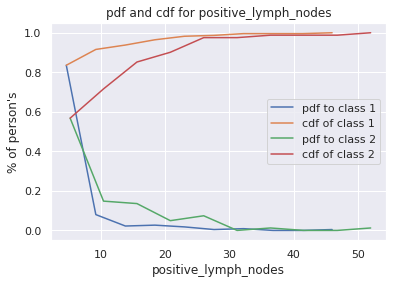

In [15]:
label = ["pdf to class 1","cdf of class 1","pdf to class 2","cdf of class 2"]
counts,bin_edges = np.histogram(one["positive_lymph_nodes"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for positive_lymph_nodes")
plt.xlabel("positive_lymph_nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(two["positive_lymph_nodes"],bins=10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

# Mean, Variance and Std-dev

In [16]:
print("Means:")
Yes = cancer_df.loc[cancer_df["survival_status_after_5_years"] == "Yes"]
no = cancer_df.loc[cancer_df["survival_status_after_5_years"] == "no"]
print(np.mean((Yes["age"])))
print(np.mean((no["age"])))

print("\n Std-dev:")
print(np.std(Yes["age"]))
print(np.std(no["age"]))


Means:
52.01777777777778
53.67901234567901

 Std-dev:
10.98765547510051
10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [17]:
print("\n Medians:")
print(np.median(Yes["age"]))
print(np.median(no["age"]))

print("\n Quantiles")
print(np.percentile(Yes["age"],np.arange(0,100,25)))
print(np.percentile(no["age"],np.arange(0,100,25)))

print("\n 90th Percentiles:")
print(np.percentile(Yes["age"],90))
print(np.percentile(no["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Yes["age"]))
print(robust.mad(no["age"]))


 Medians:
52.0
53.0

 Quantiles
[30. 43. 52. 60.]
[34. 46. 53. 61.]

 90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box Plots

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1–1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

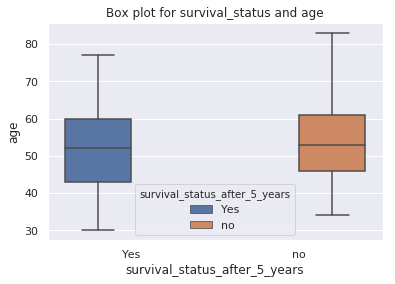

In [18]:
sns.boxplot(x ="survival_status_after_5_years",y = "age",hue = "survival_status_after_5_years",data = cancer_df).set_title("Box plot for survival_status and age")
plt.show()

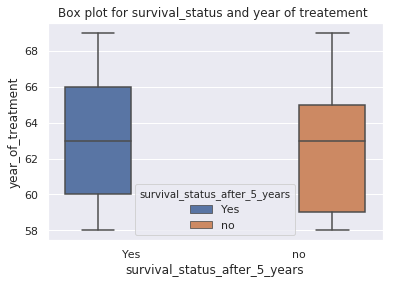

In [19]:
sns.boxplot(x= "survival_status_after_5_years",y = "year_of_treatment",hue = "survival_status_after_5_years",data = cancer_df).set_title("Box plot for survival_status and year of treatement ")
plt.show()

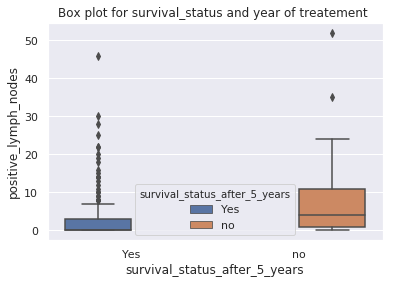

In [20]:
sns.boxplot(x= "survival_status_after_5_years",y = "positive_lymph_nodes",hue = "survival_status_after_5_years",data = cancer_df).set_title("Box plot for survival_status and year of treatement ")
plt.show()

# Violin Plots

1. Violin plot is the combination of box plot and probability density function.
2. The violin plot shows the full distribution of the data.
3. central dot represents median



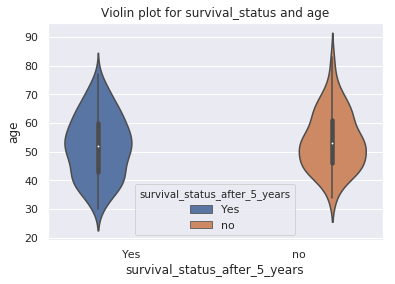

In [21]:
sns.violinplot(x="survival_status_after_5_years",y ="age",hue = "survival_status_after_5_years",data = cancer_df)
plt.title("Violin plot for survival_status and age")
plt.show()

# Scatter Plot

A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

##### 1-D Scatter Plot

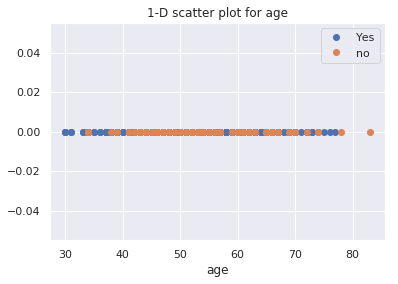

In [22]:
Yes = cancer_df.loc[cancer_df["survival_status_after_5_years"]=='Yes']
no = cancer_df.loc[cancer_df["survival_status_after_5_years"]=='no']
plt.plot(Yes["age"],np.zeros_like(Yes["age"]),'o',label =  "Yes")
plt.plot(no["age"],np.zeros_like(no["age"]),'o',label =  "no")
plt.title("1-D scatter plot for age")
plt.xlabel("age")
plt.legend()
plt.show()


##### Observations

1. After looking at this plot we can easily count number of points that are there in age range who survived or not.

2. Many person died whose age was between 41-70.

###### 2-D Scatter Plot

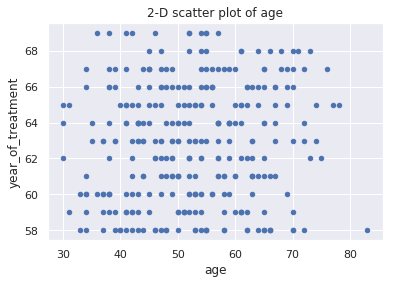

In [23]:
cancer_df.plot(kind = "scatter",x = "age", y = "year_of_treatment")
plt.title("2-D scatter plot of age")
plt.show()

##### 2-D Scatter plot with color coding for each class

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


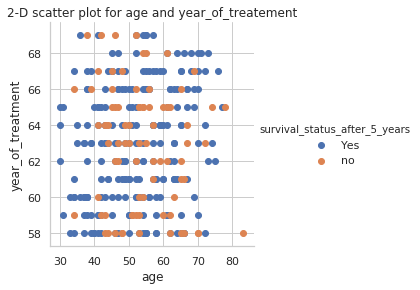

In [24]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df,hue = "survival_status_after_5_years",size = 4).map(plt.scatter,"age","year_of_treatment").add_legend()
plt.title("2-D scatter plot for age and year_of_treatement")
plt.show()

##### 2-D Scatter plot 

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


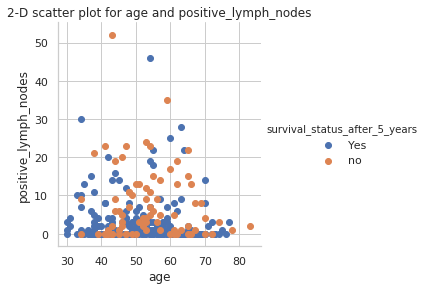

In [25]:
sns.set_style("whitegrid")
sns.FacetGrid(cancer_df,hue = "survival_status_after_5_years",size = 4).map(plt.scatter,"age","positive_lymph_nodes").add_legend()
plt.title("2-D scatter plot for age and positive_lymph_nodes")
plt.show()

##### Observation

1. In the above 2d scatter plot class label(i.e. a person died or survived) is not linearly seprable
2. 0-5 axillary_lymph_node(positive_lymph_nodes) person survived and died as well but the died ratio is less than survive ratio.

# Pair Plot

1. Here, we are generating pairplot based on survival_status
2. We use pair plot where the dimenstionality of data is less.
3. We use pair plot where the dimenstionality of data is less.

/home/Ritik-Gupta/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


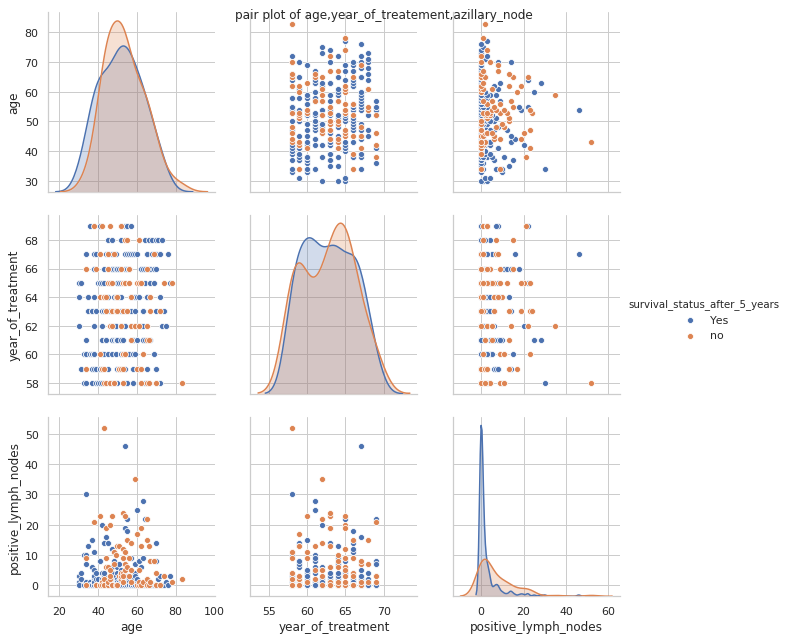

In [26]:
sns.set_style("whitegrid")
sns.pairplot(cancer_df,hue = "survival_status_after_5_years", vars = ["age","year_of_treatment","positive_lymph_nodes"],size = 3)
plt.suptitle("pair plot of age,year_of_treatement,azillary_node")
plt.show()

###### Observation

As we are unable to classify which is the most useful feature because of too much overlapping. But, Somehow we can say, In operation_year, 60-65 more person died who has less than 6 axillary_lymph_node. And hence, this plot is not much informative in this case. 

# Univariate, Bivariate and Multivariate analysis.

#### Univariate analysis:-
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

#### Bivariate Analysis:-
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.

#### Multivariate Analysis:-
Multivariate analysis is a set of techniques used for analysis of data sets that contain more than one variable, and the techniques are especially valuable when working with correlated variables.




# Multivariate probability density, contour plot.

#### 2-D Density plot, contours-plot

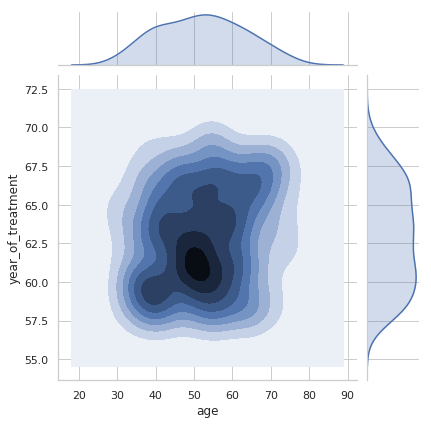

In [27]:
sns.jointplot(x="age",y="year_of_treatment", data = Yes,kind ="kde" );
plt.show();

# Conclusion

1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3. Somehow axillary_lymph_node is giving some intution in the dataset.
4. We can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.
